# Aplicación del modelo KMeans

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x, y = make_blobs(n_samples=400)

In [3]:
df = pd.DataFrame(x)

In [4]:
df.describe()

,0,1
count,400.000000,400.000000
mean,0.616315,-0.293799
std,7.036390,4.756951
min,-10.758752,-7.586330
25%,-7.775477,-3.946752
50%,2.015151,-2.635355
75%,7.713885,5.742110
max,10.887781,9.313162


### Vamos a familiarizarnos con KMeans

In [5]:
k_means_model = KMeans()

In [6]:
k_means_model.fit(df)

KMeans()

**El modelo KMeans cuenta con las siguientes características**

In [7]:
# Tenemos las etiquetas generadas
k_means_model.labels_

array([4, 2, 3, 1, 5, 5, 3, 2, 5, 0, 4, 1, 4, 3, 1, 1, 6, 2, 7, 4, 1, 4,
       3, 6, 2, 3, 4, 6, 1, 5, 3, 1, 6, 7, 6, 3, 6, 7, 1, 7, 3, 7, 2, 2,
       7, 4, 6, 0, 0, 4, 5, 1, 7, 1, 2, 6, 1, 5, 0, 7, 4, 4, 2, 2, 6, 7,
       4, 4, 1, 1, 3, 3, 5, 3, 6, 3, 4, 7, 7, 2, 3, 7, 7, 5, 3, 3, 7, 6,
       5, 7, 6, 2, 7, 5, 5, 6, 0, 7, 3, 7, 1, 0, 0, 7, 6, 7, 1, 3, 5, 7,
       3, 7, 3, 0, 6, 1, 4, 5, 1, 5, 1, 1, 2, 7, 3, 2, 5, 7, 1, 7, 4, 6,
       1, 7, 0, 2, 4, 3, 4, 5, 4, 3, 1, 0, 4, 1, 6, 6, 4, 3, 2, 0, 0, 7,
       5, 1, 7, 0, 7, 6, 7, 0, 5, 3, 1, 3, 2, 4, 1, 7, 4, 1, 3, 6, 0, 1,
       2, 3, 7, 3, 2, 5, 4, 1, 3, 5, 1, 2, 5, 2, 0, 4, 6, 4, 3, 1, 4, 6,
       3, 0, 3, 3, 2, 2, 1, 1, 1, 3, 2, 1, 0, 6, 0, 6, 1, 6, 6, 3, 1, 0,
       1, 1, 1, 7, 4, 7, 6, 7, 2, 7, 7, 6, 6, 6, 7, 1, 4, 3, 3, 7, 4, 6,
       2, 5, 1, 3, 1, 6, 1, 7, 1, 2, 5, 6, 3, 6, 6, 3, 3, 6, 6, 6, 5, 5,
       6, 5, 1, 5, 4, 5, 7, 6, 5, 6, 5, 6, 2, 5, 0, 5, 7, 0, 5, 4, 7, 6,
       1, 6, 2, 7, 5, 3, 6, 5, 3, 5, 3, 2, 5, 6, 0,

In [8]:
# Los puntos centroides
k_means_model.cluster_centers_

array([[ 8.10007246,  7.36047171],
       [ 2.10688942, -3.51176787],
       [-7.34845174, -2.35042597],
       [ 1.80021838, -5.21986839],
       [-9.44453572, -1.89044663],
       [ 9.3827069 ,  6.1605861 ],
       [ 7.68003147,  5.58680589],
       [-8.71527666, -3.55814862]])

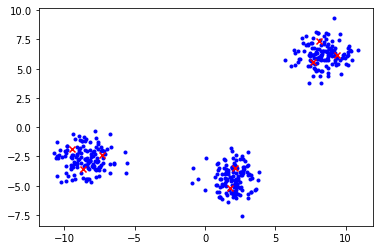

In [9]:
plt.scatter(df[0], df[1], marker=".", c="blue")
plt.scatter(k_means_model.cluster_centers_[:, 0], k_means_model.cluster_centers_[:, 1], marker='x', c="red")
plt.show()

## LA CURVA DE ELBOW

In [10]:
options = range(1, 9)
clusters = [KMeans(n_clusters=option) for option in options]
scores  = [clusters[index].fit(df).score(df) for index in range(len(clusters))]

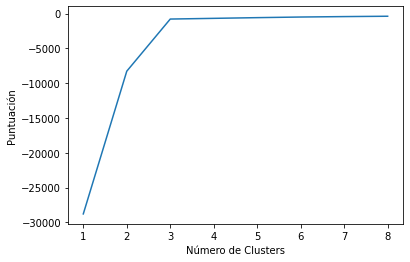

In [11]:
plt.plot(options, scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación')
plt.show()

### Entrenamos el modelo con el valor correcto de centroides

In [12]:
real_model = KMeans(n_clusters=3)

In [13]:
real_model.fit(df)

KMeans(n_clusters=3)

In [14]:
real_model.labels_

array([2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 0, 2,
       1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0,
       1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2,
       0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0,
       2, 0, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0,

In [15]:
real_model.cluster_centers_

array([[ 8.39559336,  6.22063113],
       [ 1.95584249, -4.35307111],
       [-8.51256123, -2.71843748]])

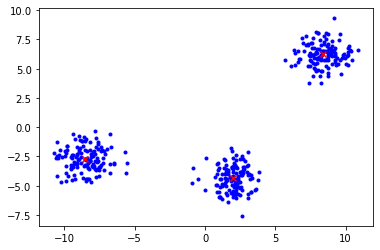

In [16]:
plt.scatter(df[0], df[1], marker=".", c="blue")
plt.scatter(real_model.cluster_centers_[:, 0], real_model.cluster_centers_[:, 1], marker='x', c="red")
plt.show()

In [29]:
predicted = real_model.predict(df.to_numpy()[0:20])

In [27]:
predicted

array([2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2])

In [28]:
experience = ['Ninguna', 'Poca', 'Bastante']
for employee in predicted:
    print(f"El empleado tiene {experience[employee]} experiencia.")

El empleado tiene Bastante experiencia.
El empleado tiene Bastante experiencia.
El empleado tiene Poca experiencia.
El empleado tiene Poca experiencia.
El empleado tiene Ninguna experiencia.
El empleado tiene Ninguna experiencia.
El empleado tiene Poca experiencia.
El empleado tiene Bastante experiencia.
El empleado tiene Ninguna experiencia.
El empleado tiene Ninguna experiencia.
El empleado tiene Bastante experiencia.
El empleado tiene Poca experiencia.
El empleado tiene Bastante experiencia.
El empleado tiene Poca experiencia.
El empleado tiene Poca experiencia.
El empleado tiene Poca experiencia.
El empleado tiene Ninguna experiencia.
El empleado tiene Bastante experiencia.
El empleado tiene Bastante experiencia.
El empleado tiene Bastante experiencia.
